# Import Necessary Dependencies

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('adult.csv')

In [70]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [71]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [72]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

# Preprocessing Data

In [73]:
df = pd.concat([df.drop(['occupation'],axis=1), pd.get_dummies(data.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop(['workclass'],axis=1), pd.get_dummies(data.workclass).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop(['marital-status'],axis=1), pd.get_dummies(data['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop(['relationship'],axis=1), pd.get_dummies(data.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop(['race'],axis=1), pd.get_dummies(data.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop(['native-country'],axis=1), pd.get_dummies(data['native-country']).add_prefix('native-country_')], axis=1)

In [74]:
df.drop(['education'], axis=1, inplace=True)

In [75]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [76]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [77]:
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False


In [79]:
df.columns.value_counts().sum()

92

<Axes: >

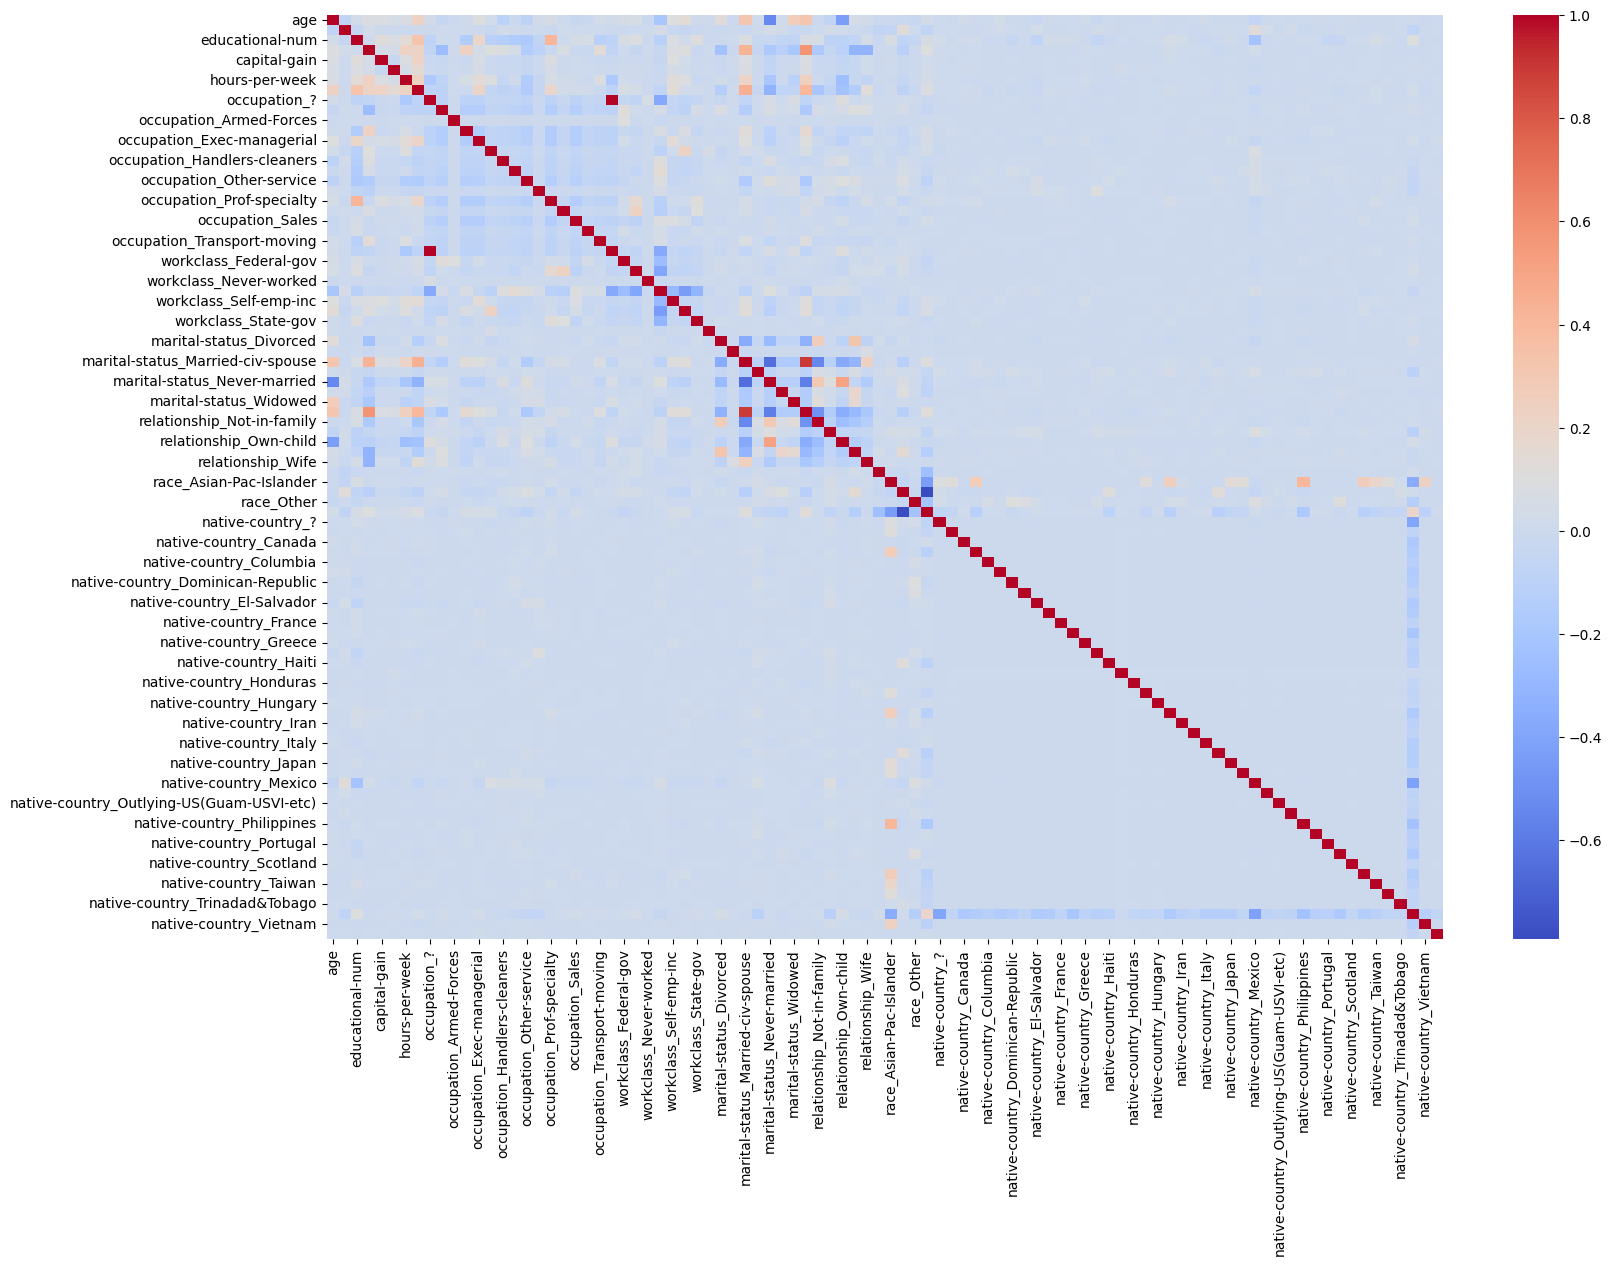

In [88]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [91]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index

In [92]:
df_dropped = df.drop(cols_to_drop, axis=1)

<Axes: >

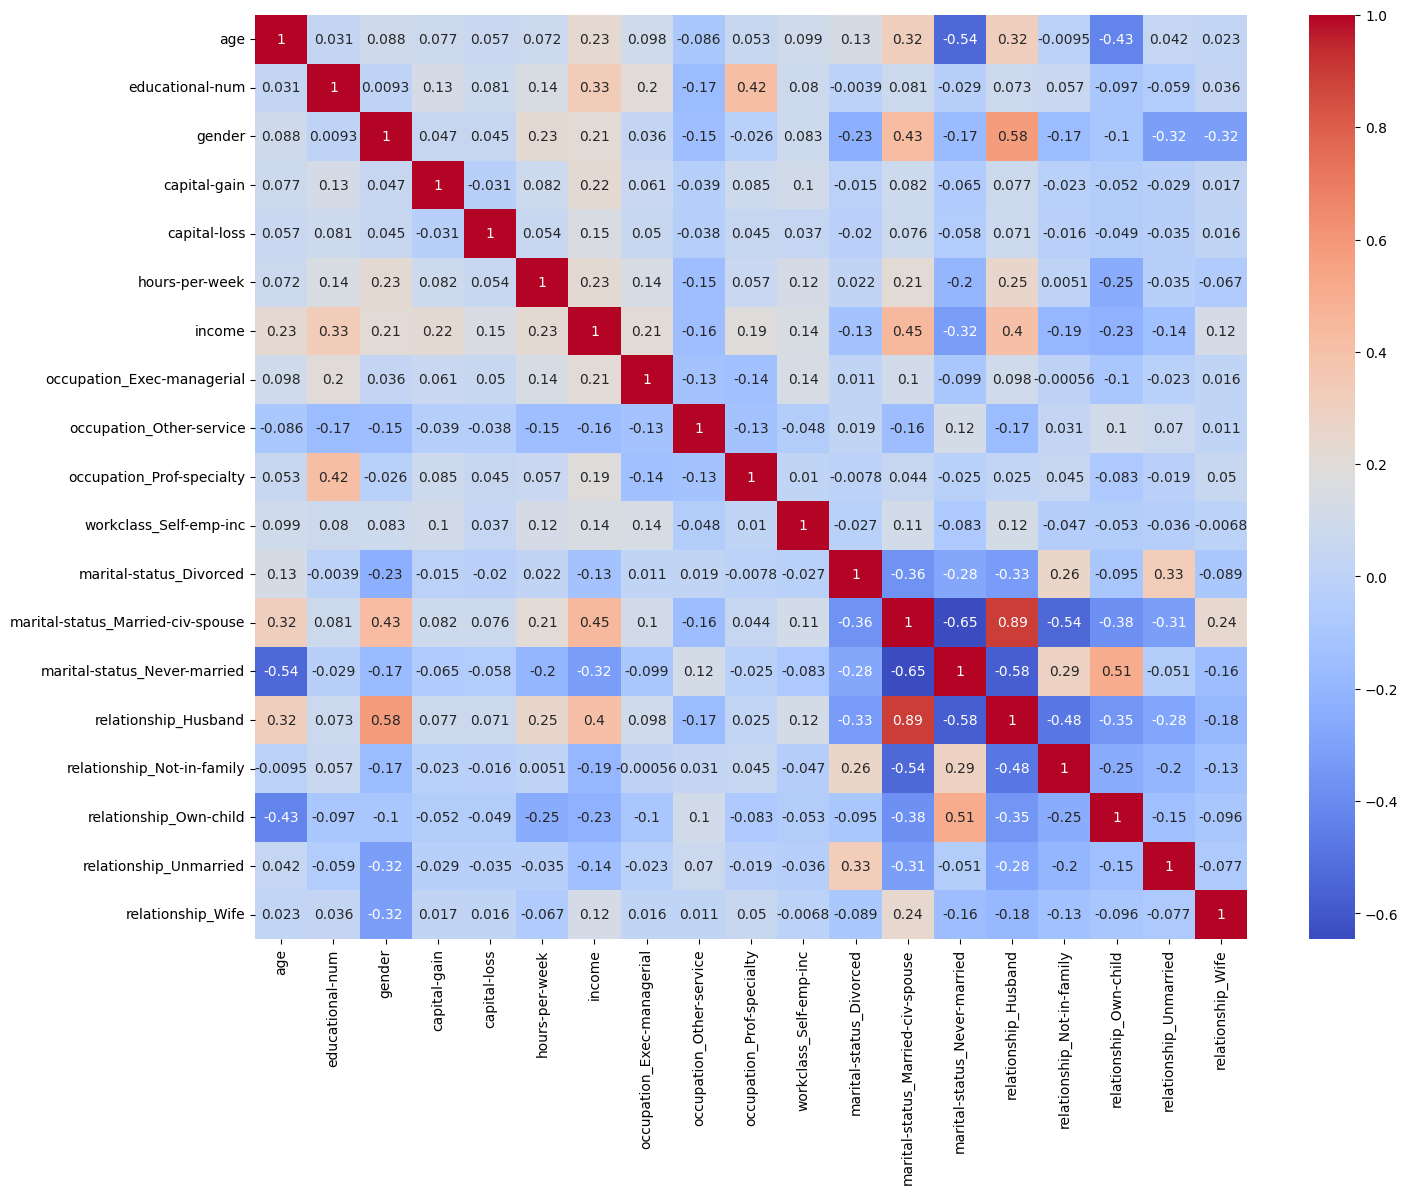

In [102]:
plt.figure(figsize=(16,12))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

# Splitting Data

In [103]:
X = df.drop(['income'], axis=1)
y = df['income']

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training our model

In [109]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier() 

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Evaluation the model

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test, y_pred)

0.8553587880028662

In [116]:
# Feature Importance
feature_import = dict(zip(forest.feature_names_in_, forest.feature_importances_))
feature_import = {k:v for k,v in sorted(feature_import.items(), key=lambda fx: x[1], reverse=True)}

In [117]:
feature_import

{'fnlwgt': 0.1718275553154816,
 'age': 0.1528850178800566,
 'capital-gain': 0.10540470642762369,
 'educational-num': 0.1047770016879504,
 'hours-per-week': 0.08496251055283638,
 'marital-status_Married-civ-spouse': 0.055283528904041174,
 'relationship_Husband': 0.04845859916576229,
 'capital-loss': 0.032989820861331835,
 'marital-status_Never-married': 0.02235695126179509,
 'occupation_Exec-managerial': 0.019731147525548297,
 'occupation_Prof-specialty': 0.016757170272304514,
 'gender': 0.010955946852185776,
 'relationship_Not-in-family': 0.010947942545177908,
 'relationship_Own-child': 0.0099003859234877,
 'relationship_Wife': 0.009470780101919998,
 'workclass_Private': 0.0086066478379197,
 'relationship_Unmarried': 0.008060165652309716,
 'occupation_Other-service': 0.007472093238262087,
 'workclass_Self-emp-not-inc': 0.007180344678203305,
 'occupation_Sales': 0.006109714950816207,
 'marital-status_Divorced': 0.006105081154130427,
 'occupation_Craft-repair': 0.005927465818838899,
 'ra

# HyperParameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {
    'n_estimators' : [50, 100, 250], 
    'max_depth' : [5, 10, 30, None],
    'min_samples_split' : [2,4], 
    'max_features' : ['sqrt', 'log2']
}

In [123]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=param_grid, 
    verbose=10
)

In [124]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.5s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.5s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.5s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.830 total time=   0.5s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)